# 복습_lstm

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
import yfinance as yf
#DataReader라는 함수는 웹 상의 데이터를 DataFrame 객체로 만드는 기능
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [4]:
from datetime import datetime

In [5]:
end = datetime.now()

In [6]:
!pip install fix_yahoo_finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix_yahoo_finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7072 sha256=a8ce6c41e0a6d983020372692a17d1e4c26557ee8d07aba5c2fcd359e6b224b4
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix_yahoo_finance


In [79]:
import yfinance as yf

df = yf.download('086520.KQ', start='2000-01-01', end='2023-11-29')
print(df.head())


[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2007-07-20  17985.572266  20683.408203  16299.425781  20683.408203   
2007-07-23  21807.507812  23774.679688  21638.892578  23774.679688   
2007-07-24  27315.587891  27315.587891  23774.679688  24730.162109   
2007-07-25  24168.113281  25854.261719  22369.556641  23718.474609   
2007-07-26  24954.982422  27259.382812  24336.728516  26416.310547   

               Adj Close   Volume  
Date                               
2007-07-20  20289.449219  1286559  
2007-07-23  23321.841797   291798  
2007-07-24  24259.125000   942625  
2007-07-25  23266.707031   503651  
2007-07-26  25913.156250   759790  


In [80]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-07-20,17985.572266,20683.408203,16299.425781,20683.408203,20289.449219,1286559
2007-07-23,21807.507812,23774.679688,21638.892578,23774.679688,23321.841797,291798
2007-07-24,27315.587891,27315.587891,23774.679688,24730.162109,24259.125000,942625
2007-07-25,24168.113281,25854.261719,22369.556641,23718.474609,23266.707031,503651
2007-07-26,24954.982422,27259.382812,24336.728516,26416.310547,25913.156250,759790
...,...,...,...,...,...,...
2023-11-22,712000.000000,722000.000000,693000.000000,700000.000000,700000.000000,327735
2023-11-23,700000.000000,708000.000000,691000.000000,703000.000000,703000.000000,170376
2023-11-24,705000.000000,710000.000000,693000.000000,695000.000000,695000.000000,175694


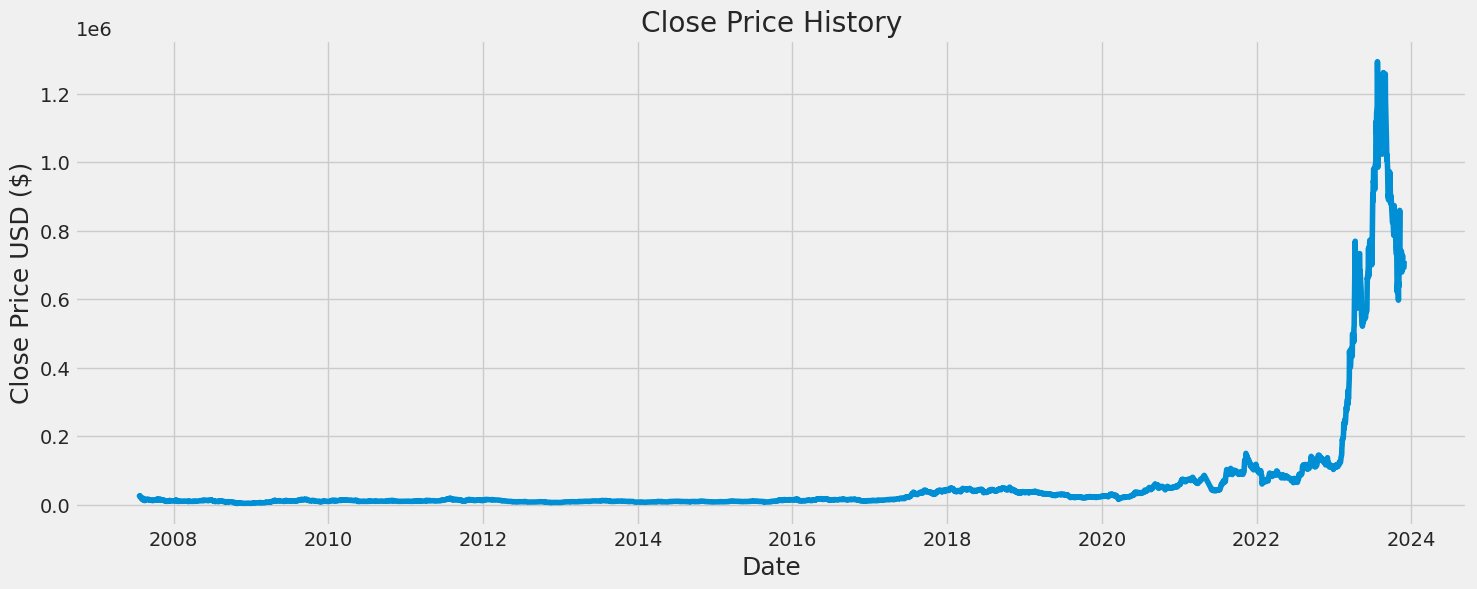

In [81]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [82]:
data = df.filter(['Close'])

In [83]:
data

,Close
Date,
2007-07-20,20683.408203
2007-07-23,23774.679688
2007-07-24,24730.162109
2007-07-25,23718.474609
2007-07-26,26416.310547
...,...
2023-11-22,700000.000000
2023-11-23,703000.000000
2023-11-24,695000.000000


In [84]:
dataset=data.values

In [85]:
len(dataset)

4018

In [86]:
dataset

array([[ 20683.40820312],
       [ 23774.6796875 ],
       [ 24730.16210938],
       ...,
       [695000.        ],
       [692000.        ],
       [711000.        ]])

In [114]:
train_data_len = int(np.ceil(len(dataset)*.96))

In [115]:
train_data_len

3858

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01320831],
       [0.01560586],
       [0.01634692],
       ...,
       [0.53619922],
       [0.53387246],
       [0.5486086 ]])

In [118]:
train_data = scaled_data[0:int(train_data_len),:]

In [119]:
train_data

array([[0.01320831],
       [0.01560586],
       [0.01634692],
       ...,
       [0.38379645],
       [0.38379645],
       [0.38457204]])

In [120]:
x_train = []
y_train = []

In [121]:
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [122]:
len(x_train)

3798

In [123]:
len(y_train)

3798

In [124]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [125]:
x_train.shape

(3798, 60)

In [126]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [127]:
x_train.shape

(3798, 60, 1)

In [128]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [129]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [130]:
model.fit(x_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
190/190 [==============================] - 8s 16ms/step - loss: 1.3839e-04
Epoch 2/20
190/190 [==============================] - 2s 13ms/step - loss: 7.4508e-05
Epoch 3/20
190/190 [==============================] - 2s 11ms/step - loss: 4.5665e-05
Epoch 4/20
190/190 [==============================] - 2s 11ms/step - loss: 2.2816e-05
Epoch 5/20
190/190 [==============================] - 2s 11ms/step - loss: 3.5290e-05
Epoch 6/20
190/190 [==============================] - 2s 11ms/step - loss: 2.3571e-05
Epoch 7/20
190/190 [==============================] - 3s 15ms/step - loss: 1.8443e-05
Epoch 8/20
190/190 [==============================] - 3s 13ms/step - loss: 2.6061e-05
Epoch 9/20
190/190 [==============================] - 2s 11ms/step - loss: 2.4515e-05
Epoch 10/20
190/190 [==============================] - 2s 11ms/step - loss: 2.5541e-05
Epoch 11/20
190/190 [==============================] - 2s 11ms/step - loss: 2.1598e-05
Epoch 12/20
190/190 [==============================]

In [131]:
test_data = scaled_data[train_data_len-60:,:]

In [132]:
test_data

array([[0.08271374],
       [0.08217082],
       [0.08294641],
       [0.08178303],
       [0.08752237],
       [0.08713458],
       [0.08635899],
       [0.08752237],
       [0.08620388],
       [0.08620388],
       [0.08341176],
       [0.08473026],
       [0.0882204 ],
       [0.09380462],
       [0.09380462],
       [0.0953558 ],
       [0.09240857],
       [0.09675185],
       [0.09876838],
       [0.10388725],
       [0.11055729],
       [0.12583635],
       [0.1311879 ],
       [0.14538113],
       [0.14297681],
       [0.14980198],
       [0.15011221],
       [0.16275427],
       [0.18253173],
       [0.16818338],
       [0.18020497],
       [0.1898998 ],
       [0.18136835],
       [0.18524628],
       [0.18485849],
       [0.21433078],
       [0.21859651],
       [0.21045285],
       [0.22945472],
       [0.23721059],
       [0.22363782],
       [0.25621246],
       [0.25078335],
       [0.236435  ],
       [0.27754109],
       [0.28490916],
       [0.34462933],
       [0.336

In [133]:
x_test = []
y_test = dataset[train_data_len:, :]

In [134]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [135]:
x_test = np.array(x_test)

In [136]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [137]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 9ms/step


In [138]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

64878.73679620393

<ipython-input-139-e8663f7b3d11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


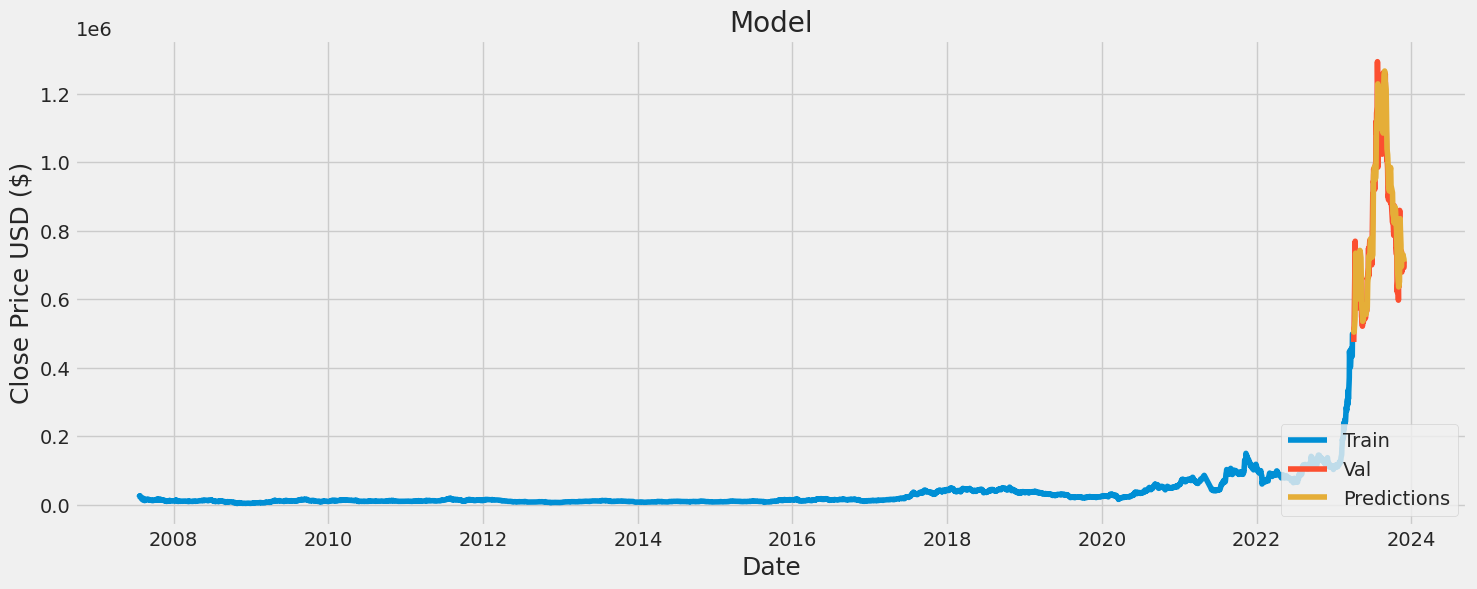

In [139]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

급등구간이라 설명력이 많이 떨어진듯